In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
# Set working directory
os.chdir("C:/Users/Lenovo/Documents/LM/EdWisor/Python")

In [3]:
os.getcwd()

'C:\\Users\\Lenovo\\Documents\\LM\\EdWisor\\Python'

In [4]:
# Load Data
Data_Day = pd.read_csv("day.csv")

In [5]:
Data_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# EXPLORATORY DATA ANALYSIS

In [6]:
#Check Type of DataFrame
print(type(Data_Day))

<class 'pandas.core.frame.DataFrame'>


In [7]:
#Data Types of Varaibles

print(Data_Day.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
#Dimension
print(Data_Day.shape)

(731, 16)


In [9]:
# Index range

print(Data_Day.index)

RangeIndex(start=0, stop=731, step=1)


In [10]:
#columns 

print(Data_Day.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [11]:
#unique values present in each variable

print(Data_Day.nunique())

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [12]:
# variable "instant" can be dropped as it simply represents the index
# Variable "dteday" can be ignored as output is not based on time series analysis
# casual and registered variables can be removed, as these two sums to dependent variable count

Data_Day = Data_Day.drop(Data_Day.columns[[0, 1, 13, 14]], axis = "columns")

print(Data_Day.shape)

(731, 12)


In [13]:
#Defining numeric and categorical variables and saving in specific array

numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# DATA PRE PROCESSING

## Missing Value Analysis

In [14]:
#sum of missing values 

Data_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

### No missing values found

## Outlier Analysis

temp


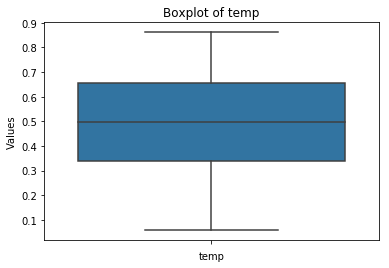

atemp


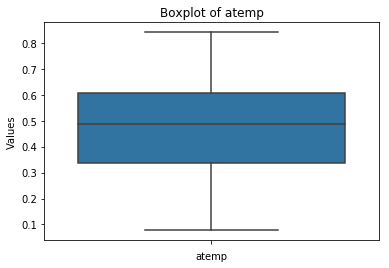

hum


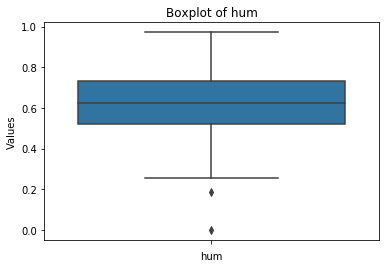

windspeed


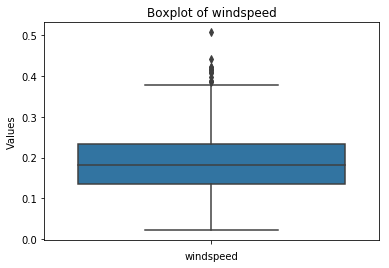

cnt


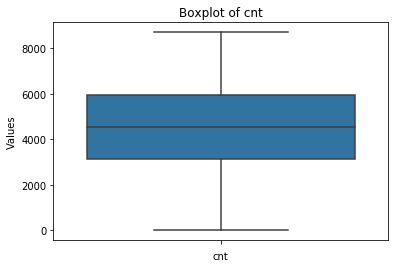

In [15]:
for i in numeric_var:
    print(i)
    sns.boxplot(y = Data_Day[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

### outliers are found in windspeed and humidity variables.

In [16]:
# Identify outliers
#calculate Inner Fence, Outer Fence, and IQR

for i in numeric_var:
    print(i)
    q75, q25 = np.percentile(Data_Day.loc[:,i], [75, 25])
    iqr = q75 - q25
    Innerfence = q25 - (iqr*1.5)
    Upperfence = q75 + (iqr*1.5)
    print("Innerfence= "+str(Innerfence))
    print("Upperfence= "+str(Upperfence)) 
    print("IQR ="+str(iqr))
    

# replace outliers with NA

    Data_Day.loc[Data_Day[i]<Innerfence, i] = np.nan
    Data_Day.loc[Data_Day[i]>Upperfence, i] = np.nan

temp
Innerfence= -0.14041600000000015
Upperfence= 1.1329160000000003
IQR =0.3183330000000001
atemp
Innerfence= -0.06829675000000018
Upperfence= 1.0147412500000002
IQR =0.2707595000000001
hum
Innerfence= 0.20468725
Upperfence= 1.0455212500000002
IQR =0.21020850000000002
windspeed
Innerfence= -0.012446750000000034
Upperfence= 0.38061125
IQR =0.0982645
cnt
Innerfence= -1054.0
Upperfence= 10162.0
IQR =2804.0


In [17]:
Data_Day.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
cnt            0
dtype: int64

In [18]:
# total 15 outliers found. Now, impute the values, by the help of median.

Data_Day['hum'] = Data_Day['hum'].fillna(Data_Day['hum'].median())
Data_Day['windspeed'] = Data_Day['windspeed'].fillna(Data_Day['windspeed'].median())

In [19]:
# Check NA Values

Data_Day.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

## DATA UNDERSTANDING

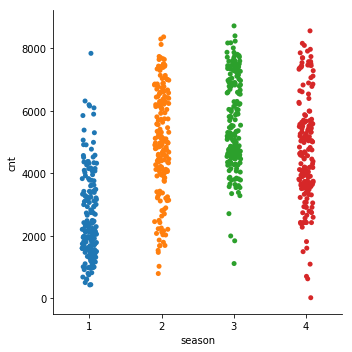

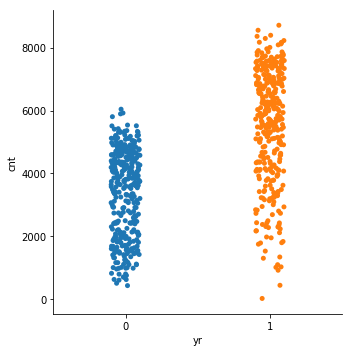

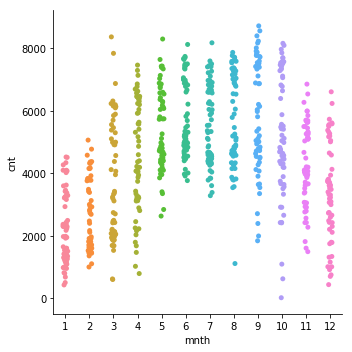

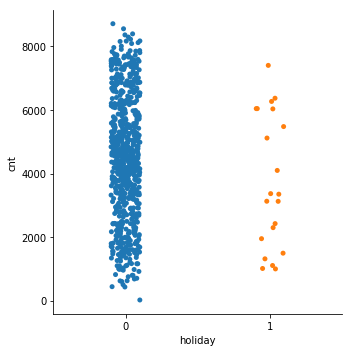

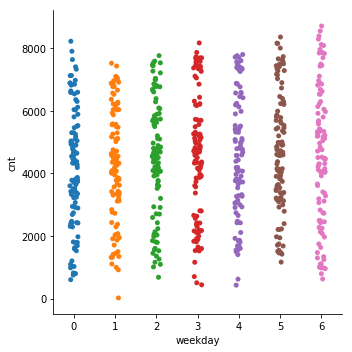

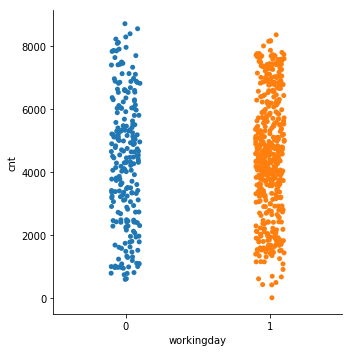

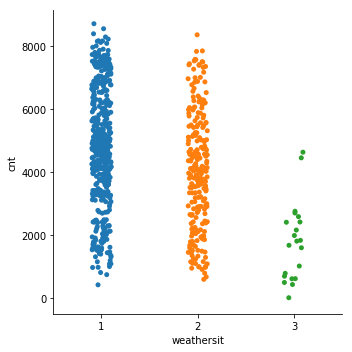

In [20]:
for i in categorical_var:
    sns.catplot(x = i, y = "cnt", data=Data_Day)
   
  

#### It is found that
#### In Season 2, 3 and 4 has the highest count
#### In Year 1 has high count than 0
#### In Months 3 to 10 has got pretty good count
#### On holidays the count is higher compared non-holidays
#### In weekdays, 0 and 6 has the highest count
#### In weather, 1 has the highest count

Text(0.5, 0, 'Windspeed')

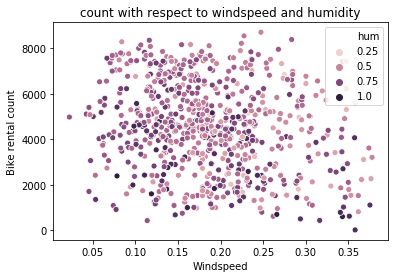

In [21]:
scatter_plot1 = sns.scatterplot(x="windspeed", y="cnt", hue="hum", data= Data_Day)

plt.title("count with respect to windspeed and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("Windspeed")


### count vs windspeed and humidity, Count is High in ranges, windspeed 0.10 to 0.25  and humidity 0.5 to 0.75

Text(0.5, 0, 'Weekdays')

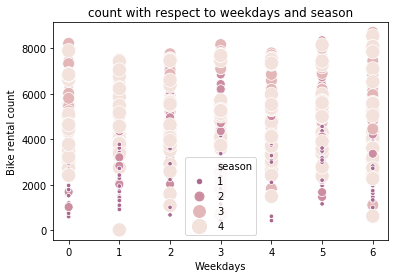

In [22]:
cmap = sns.cubehelix_palette(dark=.9, light=.5, as_cmap=True)

scatter_plot2 = sns.scatterplot(x="weekday", y="cnt",
            hue="season", size="season", sizes = (20, 200), palette=cmap, data= Data_Day)

plt.title("count with respect to weekdays and season")
plt.ylabel("Bike rental count")
plt.xlabel("Weekdays")



### count vs weekdays and season, Count is high in 4th season and 1st and 6th weekdays 

Text(0.5, 0, 'Temperature')

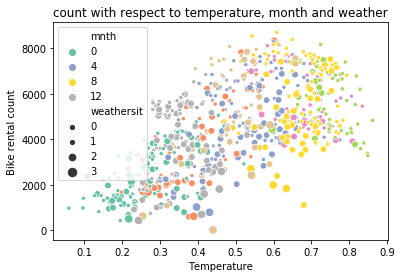

In [23]:
cmap2 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot3 = sns.scatterplot(x="temp", y="cnt", hue="mnth", size="weathersit", palette="Set2", data=Data_Day)

plt.title("count with respect to temperature, month and weather")
plt.ylabel("Bike rental count")
plt.xlabel("Temperature")



### count vs  temperature, month and weather, Count is high in range temperature 0.5 to 0.8, in 8th month and weather is 0.

Text(0.5, 0, 'Month')

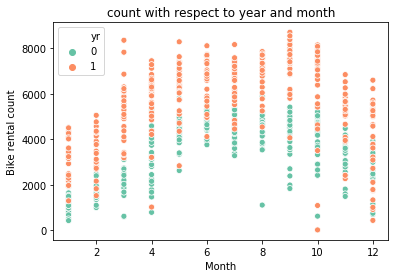

In [24]:
cmap3 = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

scatter_plot4 = sns.scatterplot(x="mnth", y="cnt", hue="yr", palette="Set2", data= Data_Day)

plt.title("count with respect to year and month")
plt.ylabel("Bike rental count")
plt.xlabel("Month")


### count vs respect to year and month, count is high in year 1, particularly from season 3 to 12 excluding 9 

# FEATURE SELECTION

In [25]:
# Correlation Analysis and Anova test to find varaibles which can be excluded

Data_Day_cor = Data_Day.loc[:, numeric_var]
correlation_result = Data_Day_cor.corr()
print(correlation_result)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.123723  -0.138937  0.627494
atemp      0.991702  1.000000  0.137312  -0.164157  0.631066
hum        0.123723  0.137312  1.000000  -0.200237 -0.121454
windspeed -0.138937 -0.164157 -0.200237   1.000000 -0.215203
cnt        0.627494  0.631066 -0.121454  -0.215203  1.000000


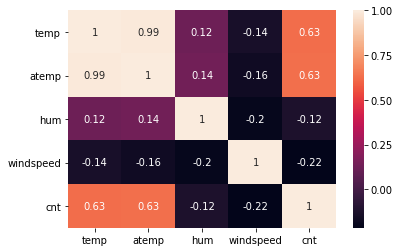

In [26]:
heatmap = sns.heatmap(correlation_result, annot=True)

### It is found that temperature and atemp are highly correlated with each other.

In [27]:
# Anova Test

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in categorical_var:
    mod = ols('cnt' + '~' + i, data = Data_Day).fit()
    anova_table = sm.stats.anova_lm(mod, typ = 2)
    print(anova_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

### It is found that holiday, weekday and workingday has p value > 0.05, by which, we accept null hypothesis.

In [28]:
#Dimension Reduction

Data_Day = Data_Day.drop(['atemp', 'holiday', 'weekday', 'workingday'], axis = "columns")
print(Data_Day.shape)

(731, 8)


In [29]:
#Final Variables

numeric_var = ["temp","hum","windspeed","cnt"]   # numeric variables

categorical_var = ["season", "yr", "mnth", "weathersit"]   # categorical variables

## FEATURE SCALING

temp


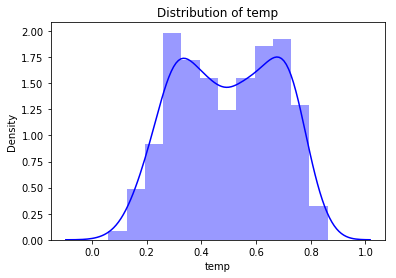

hum


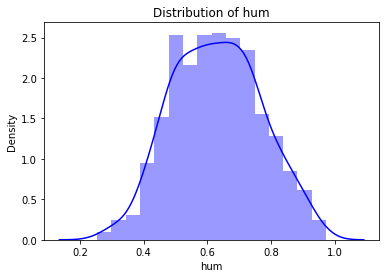

windspeed


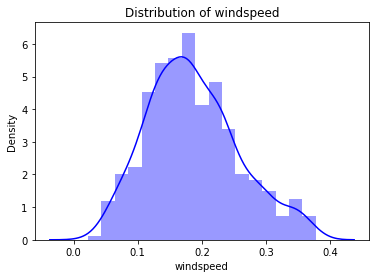

cnt


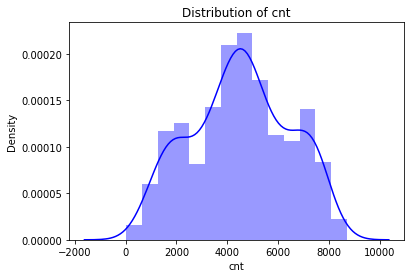

In [30]:
# Check normality 
for i in numeric_var:
    print(i)
    sns.distplot(Data_Day[i], bins = 'auto', color = 'blue')
    plt.title("Distribution of "+i)
    plt.ylabel("Density")
    plt.show()

### distributions are, approximately symmetric

In [31]:
# Check min and max values 

Data_Day.describe()

,season,yr,mnth,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.629354,0.186257,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.139566,0.071156,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.254167,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.522291,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.627500,0.178802,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.229786,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.378108,8714.000000


### everything is normalized, no need of scaling

# MODEL DEVELOPMENT

In [32]:
df = Data_Day.copy()
Data_Day = df.copy()

In [33]:
# Create dummy variables

Data_Day = pd.get_dummies(Data_Day, columns = categorical_var) 

Data_Day.shape

(731, 25)

In [34]:
Data_Day.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df_for_KFCV = Data_Day

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr 

In [37]:
#define Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [38]:
#predictors and target

X = Data_Day.drop(['cnt'], axis = "columns")
y = Data_Day['cnt']

In [39]:
#divide the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

## DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeRegressor
DTModel = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Prediction

DTTest = DTModel.predict(X_test)

# MAPE
DTMape_Test = MAPE(y_test, DTTest)


# Rsquare - Test Data

DTR2_Test = Rsquare(y_test, DTTest)

DTR2_Test1 = DTR2_Test.ravel()

DTR2_Test2 = float(DTR2_Test1[1])


print("MAPE ="+str(DTMape_Test))
print("Accuracy =" + str(100 - DTMape_Test))
print("Rsquare ="+str(DTR2_Test2))

MAPE =36.94809301452646
Accuracy =63.05190698547354
Rsquare =0.6544606873373328


In [41]:
DTModel

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Predictions
RFTest = RFModel.predict(X_test)

# MAPE 
RFMape_Test = MAPE(y_test, RFTest)

# Rsquare - Test Data

RFR2_Test = Rsquare(y_test, RFTest)

RFR2_Test1 = RFR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])

print("MAPE ="+str(RFMape_Test))
print("Accuracy =" + str(100 - RFMape_Test))
print("Rsquare ="+str(RFR2_Test2))

MAPE =20.76397118318941
Accuracy =79.23602881681059
Rsquare =0.8858067055627247


In [43]:
RFModel

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# LINEAR REGRESSION MODEL

In [44]:
import statsmodels.api as sm
LRModel= sm.OLS(y_train, X_train).fit()
print(LRModel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 29 Jul 2019   Prob (F-statistic):          1.63e-203
Time:                        11:14:08   Log-Likelihood:                -4716.2
No. Observations:                 584   AIC:                             9474.
Df Residuals:                     563   BIC:                             9566.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          4807.6605    477.418     10.070   

In [45]:
#Prediction

LRTest = LRModel.predict(X_test)

#MAPE

LRMape_Test = MAPE(y_test, LRTest)


#Rsquare -Test Data

LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])


print("MAPE ="+str(LRMape_Test))
print("Accuracy =" + str(100 - LRMape_Test))
print("Rsquare ="+str(LRR2_Test2))



MAPE =18.800696038206944
Accuracy =81.19930396179305
Rsquare =0.8436040019904946


# KFold Cross Validation

In [46]:
df_for_KFCV.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
X_kf = df_for_KFCV.drop(['cnt'], axis = "columns")
y_kf = df_for_KFCV['cnt']

In [48]:
X_kf.head()

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
cross_val_score(DecisionTreeRegressor(max_depth=2), X_kf,y_kf, cv = 3)
#array([ 0.23365401, -0.23313404,  0.15690143])

DT_Score = cross_val_score(DecisionTreeRegressor(max_depth=2), X_kf,y_kf, cv = 3)
np.average(DT_Score)


0.05247379896663843

In [51]:
cross_val_score(RandomForestRegressor(), X_kf,y_kf, cv = 3)
#array([0.69521348, 0.27999794, 0.452253  ])
RF_Score = cross_val_score(RandomForestRegressor(n_estimators = 100), X_kf,y_kf, cv = 3)
np.average(RF_Score)


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.46828238995078825

In [52]:
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(), X_kf,y_kf, cv = 3)
#array([0.73477372, 0.6035598 , 0.54577344])

LR_Score = cross_val_score(LinearRegression(), X_kf,y_kf, cv = 3)
np.average(LR_Score)


0.6280356539519311

In [59]:
 ## SAMPLE INPUT OUTPUT

In [58]:
LRModel.predict([[0.4, 0.8, 0.5,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0]])

array([834.64751804])

In [ ]:
#Putting all the variables humidity, weather, temperature , season, month and year,
#it is found that for those particular input we got above result